In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import sys
import cufflinks
import cufflinks as cf
%matplotlib inline

In [2]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df_Data_Train=pd.read_excel(r"E:\Data_Train.xlsx")
df_test_set=pd.read_excel(r"E:\Test_set.xlsx")

In [4]:
df_Data_Train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
df_test_set

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:
df = df_Data_Train._append(df_test_set) # add two tables one under the other (columns)

In [7]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [8]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [9]:
df['Date_of_Journey'].str.split('/').str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [10]:
df.shape

(13354, 11)

In [11]:
# Feature Engineering Process
df['Day']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [12]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,06,2019
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,03,2019
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,03,2019
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,03,2019


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Day              13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


In [14]:
df['Day']=df['Day'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Day              13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [16]:
# Feature Engineering Process
df['Departure_hours']=df['Dep_Time'].str.split(':').str[0]
df['Departure_minutes']=df['Dep_Time'].str.split(':').str[1]

In [17]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hours,Departure_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,05,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,09,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,18,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,2019,20,30
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019,14,20
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,2019,21,50
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019,04,00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13354 non-null  object 
 1   Date_of_Journey    13354 non-null  object 
 2   Source             13354 non-null  object 
 3   Destination        13354 non-null  object 
 4   Route              13353 non-null  object 
 5   Dep_Time           13354 non-null  object 
 6   Arrival_Time       13354 non-null  object 
 7   Duration           13354 non-null  object 
 8   Total_Stops        13353 non-null  object 
 9   Additional_Info    13354 non-null  object 
 10  Price              10683 non-null  float64
 11  Day                13354 non-null  int32  
 12  Month              13354 non-null  int32  
 13  Year               13354 non-null  int32  
 14  Departure_hours    13354 non-null  object 
 15  Departure_minutes  13354 non-null  object 
dtypes: float64(1), int32(3), obj

In [19]:
df['Departure_hours']=df['Departure_hours'].astype(int)
df['Departure_minutes']=df['Departure_minutes'].astype(int)

In [20]:
df.drop('Dep_Time', axis=1, inplace=True)

In [21]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hours,Departure_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,2019,20,30
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,16:55,2h 35m,non-stop,No info,NaN,27,3,2019,14,20
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,2019,21,50
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,19:15,15h 15m,1 stop,No info,NaN,6,3,2019,4,0


In [22]:
df.dtypes

Airline               object
Date_of_Journey       object
Source                object
Destination           object
Route                 object
Arrival_Time          object
Duration              object
Total_Stops           object
Additional_Info       object
Price                float64
Day                    int32
Month                  int32
Year                   int32
Departure_hours        int32
Departure_minutes      int32
dtype: object

In [23]:
df['Arrival_Time'].str.split(' ').str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [24]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x : x.split(' ')[0]) # very important

In [25]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [26]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hours,Departure_minutes,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13,15


In [27]:
df.drop('Arrival_Time', axis=1, inplace=True)

In [28]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hours,Departure_minutes,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13,15


In [29]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [30]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: count, dtype: int64

In [31]:
df.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Route                   1
Duration                0
Total_Stops             1
Additional_Info         0
Price                2671
Day                     0
Month                   0
Year                    0
Departure_hours         0
Departure_minutes       0
Arrival_hour            0
Arrival_min             0
dtype: int64

In [32]:
# Ordinal Encoding
df['Total_Stops']=df['Total_Stops'].map({ '1 stop': 1,'non-stop':0, '2 stops': 2, '3 stops': 3, '4 stops': 4, 'nan': 1})

In [33]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hours,Departure_minutes,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,22,20,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,9,25,04,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1.0,No info,NaN,6,6,2019,20,30,20,25
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,2h 35m,0.0,No info,NaN,27,3,2019,14,20,16,55
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,6h 35m,1.0,No info,NaN,6,3,2019,21,50,04,25
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,15h 15m,1.0,No info,NaN,6,3,2019,4,0,19,15


In [34]:
df.drop('Route', axis=1, inplace=True)

In [35]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hours,Departure_minutes,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,22,20,01,10
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,9,25,04,25
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,16,50,21,35


In [36]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hours,Departure_minutes,Arrival_hour,Arrival_min
9039,Air India,6/05/2019,Delhi,Cochin,23h 40m,NaN,No info,7480.0,6,5,2019,9,45,09,25


In [37]:
df.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Duration                0
Total_Stops             1
Additional_Info         0
Price                2671
Day                     0
Month                   0
Year                    0
Departure_hours         0
Departure_minutes       0
Arrival_hour            0
Arrival_min             0
dtype: int64

In [38]:
df.drop(9039, axis=0, inplace=True)

In [39]:
df.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Duration                0
Total_Stops             0
Additional_Info         0
Price                2671
Day                     0
Month                   0
Year                    0
Departure_hours         0
Departure_minutes       0
Arrival_hour            0
Arrival_min             0
dtype: int64

In [40]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

# Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [42]:
df['Airline']=labelencoder.fit_transform(df['Airline'])
df['Source']=labelencoder.fit_transform(df['Source'])
df['Destination']=labelencoder.fit_transform(df['Destination'])
df['Additional_Info']=labelencoder.fit_transform(df['Additional_Info'])

In [43]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hours,Departure_minutes,Arrival_hour,Arrival_min
0,3,24/03/2019,0,5,2h 50m,0.0,8,3897.0,24,3,2019,22,20,01,10
1,1,1/05/2019,3,0,7h 25m,2.0,8,7662.0,1,5,2019,5,50,13,15


In [44]:
df['duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [46]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hours,Departure_minutes,Arrival_hour,Arrival_min,duration_hour
0,3,24/03/2019,0,5,2h 50m,0.0,8,3897.0,24,3,2019,22,20,01,10,2
1,1,1/05/2019,3,0,7h 25m,2.0,8,7662.0,1,5,2019,5,50,13,15,7


In [45]:
df[df['duration_hour']=='5m']

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hours,Departure_minutes,Arrival_hour,Arrival_min,duration_hour
6474,1,6/03/2019,4,3,5m,2.0,8,17327.0,6,3,2019,16,50,16,55,5m
2660,1,12/03/2019,4,3,5m,2.0,8,NaN,12,3,2019,16,50,16,55,5m


In [47]:
df.drop(6474, axis=0, inplace=True)

In [48]:
df.drop(2660, axis=0, inplace=True)

In [49]:
df.drop('Duration', axis=1, inplace=True)

In [50]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hours,Departure_minutes,Arrival_hour,Arrival_min,duration_hour
0,3,24/03/2019,0,5,0.0,8,3897.0,24,3,2019,22,20,01,10,2
1,1,1/05/2019,3,0,2.0,8,7662.0,1,5,2019,5,50,13,15,7
2,4,9/06/2019,2,1,2.0,8,13882.0,9,6,2019,9,25,04,25,19
3,3,12/05/2019,3,0,1.0,8,6218.0,12,5,2019,18,5,23,30,5
4,3,01/03/2019,0,5,1.0,8,13302.0,1,3,2019,16,50,21,35,4


In [51]:
df.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Total_Stops             0
Additional_Info         0
Price                2670
Day                     0
Month                   0
Year                    0
Departure_hours         0
Departure_minutes       0
Arrival_hour            0
Arrival_min             0
duration_hour           0
dtype: int64

In [52]:
df.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hours,Departure_minutes
count,13350.000000,13350.000000,13350.000000,13350.000000,13350.000000,10680.000000,13350.000000,13350.000000,13350.0,13350.000000,13350.000000
mean,3.977753,1.953783,1.435281,0.825768,7.407566,9086.049345,13.391161,4.710712,2019.0,12.513258,24.501124
std,2.363930,1.178518,1.473454,0.674478,1.198528,4611.111643,8.439823,1.165552,0.0,5.736812,18.831566
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000
50%,4.000000,2.000000,1.000000,1.000000,8.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000
75%,4.000000,3.000000,2.000000,1.000000,8.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000


In [53]:
df['Price']=df['Price'].fillna(df['Price'].mean())

In [54]:
# outliers replaced by - median, mode frequency larger replaced by - mean, higher frequency replaced by lower freqeuncy - mode

D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1500x1500 with 0 Axes>

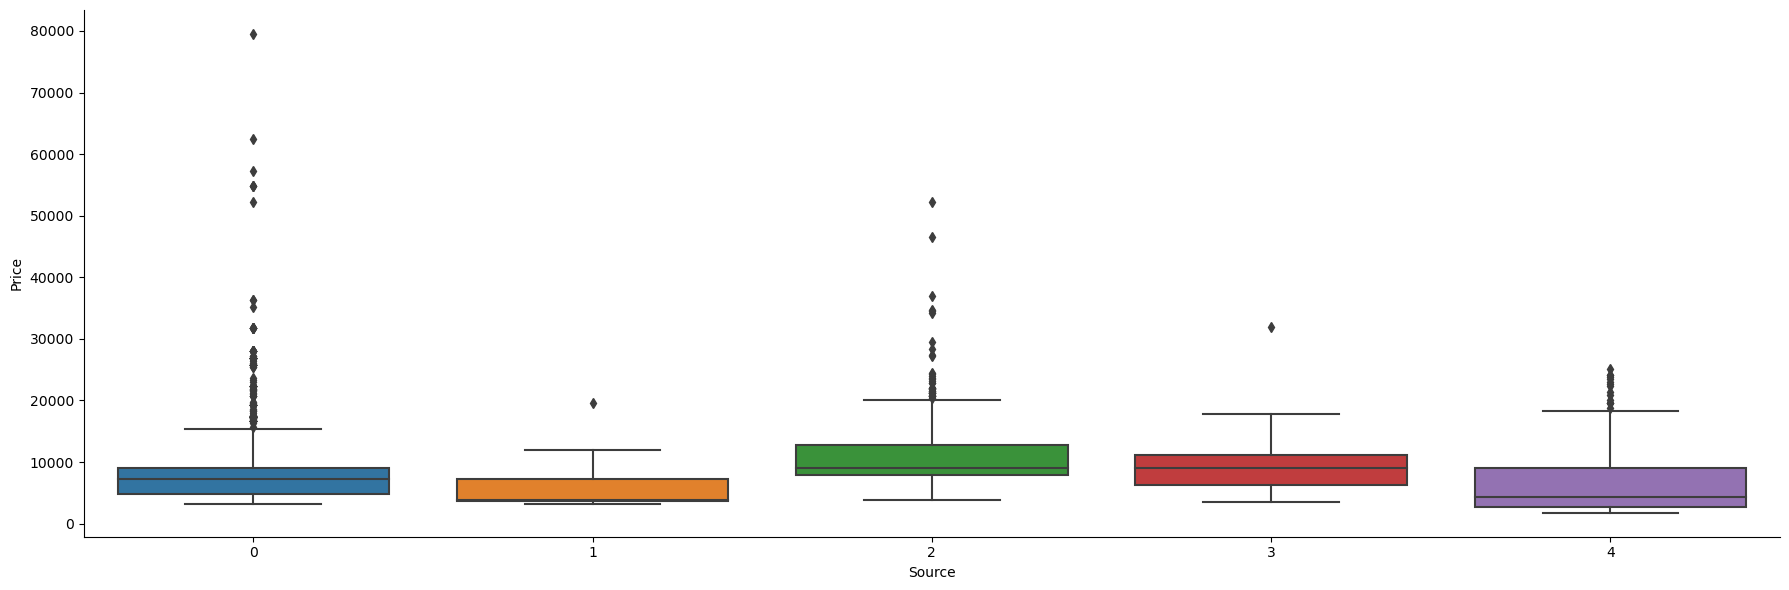

In [55]:
plt.figure(figsize=(15,15))
sns.catplot(y="Price", x = "Source", data=df.sort_values("Price", ascending=True), kind= "box", height=6, aspect=3)

D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x1200 with 0 Axes>

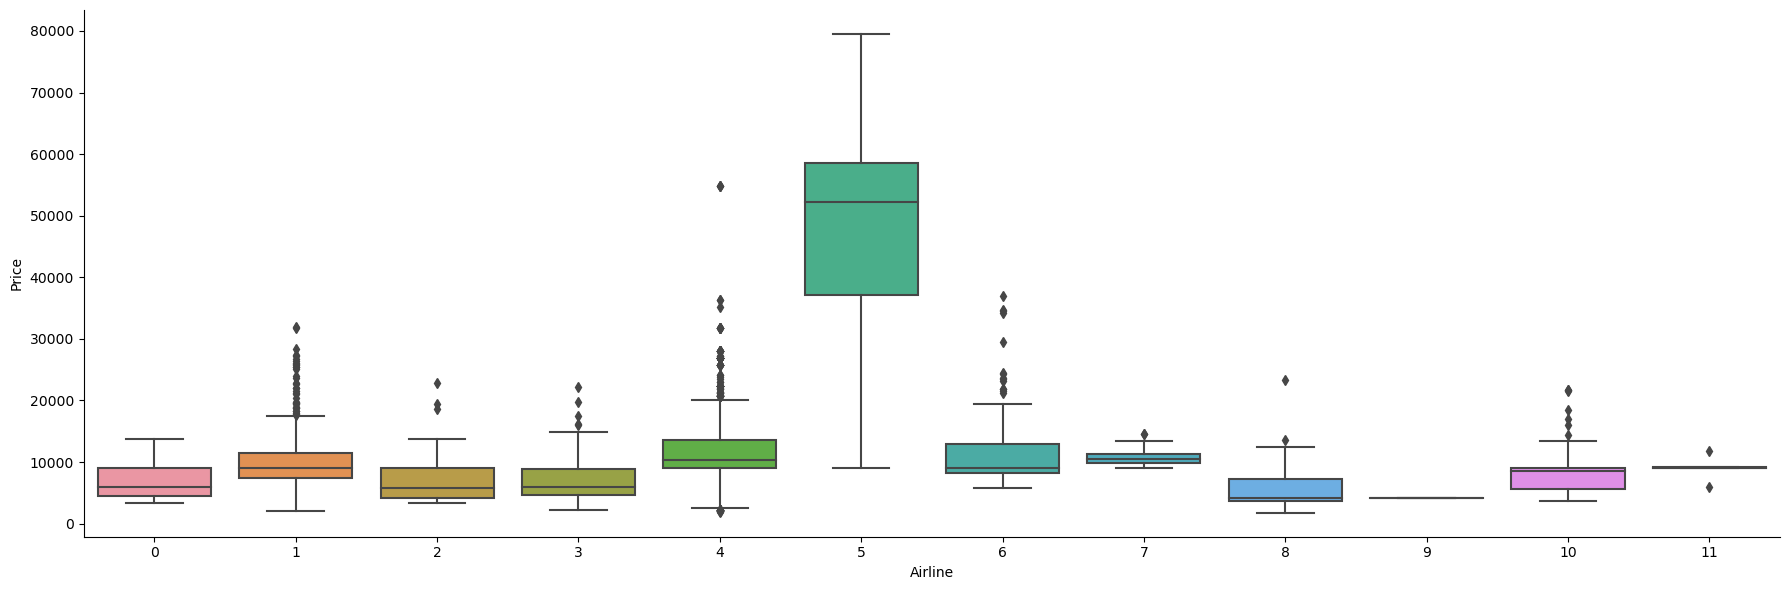

In [56]:
plt.figure(figsize=(12,12))
sns.catplot(y="Price", x = "Airline", data=df.sort_values("Price", ascending=False), kind= "box", height=6, aspect=3)

D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x1200 with 0 Axes>

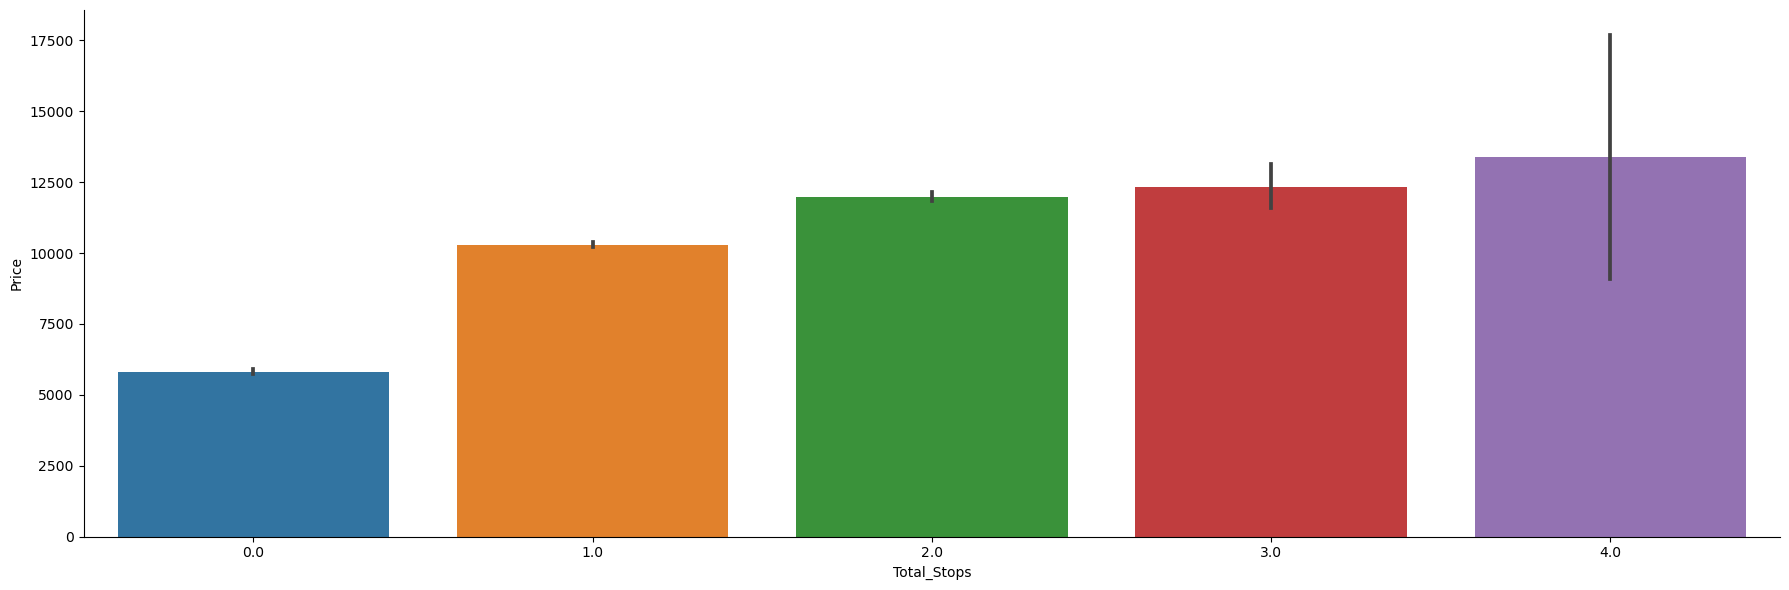

In [57]:
plt.figure(figsize=(12,12))
sns.catplot(y="Price", x = "Total_Stops", data=df.sort_values("Price", ascending=False), kind= "bar", height=6, aspect=3)

D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x1200 with 0 Axes>

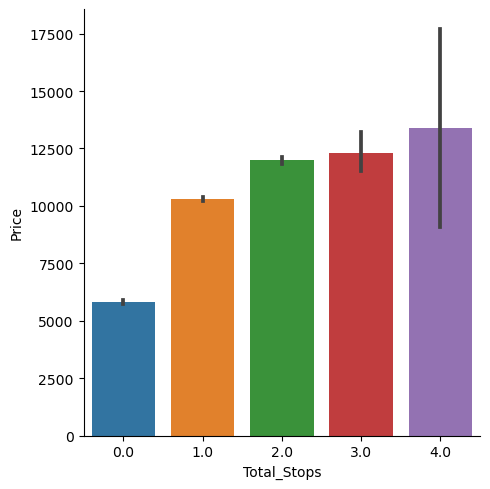

In [58]:
plt.figure(figsize=(12,12))
sns.catplot(y="Price", x="Total_Stops", data=df, kind ="bar")